# The three basic types of problems
## Artificial Intelligence 1
### Lecture 1, part 2
Jim Smith

# The Big Idea
(parts of) computers do things in a sequence

<div >
<div style="float:left; width: 25%;">
    <h3>Input</h3> 
    <ul>
        <li>keyboard</li>
        <li> mouse</li>
        <li> joystick</li>
        <li> camera</li>
        <li>microphone</li>
        <li><b> another computer or programme</b></li>
     </ul>
  </div>
 
    
 <div style = "float:left;width:5%">
 <br><br><br>   <span style='font-size:50px;'>&#8680;</span>
 </div>
    
<div  style="float:left; width:30%;background:lightblue">
    <h3>Model</h3>
    of a process or part of the world
    <ul>
        <li>designed by a person</li>
        <li> or learned by an algorithm</li>
    </ul>
</div>

<div style = "float:left;width:5%">
 <br><br><br>   <span style='font-size:50px;'>&#8680;</span>
</div>

 <div style="float:left; width:25%">
    <h3>Output</h3> 
    <ul>
        <li>screen</li>
        <li> motor</li>
        <li>loudspeaker</li>
        <li><b> another computer or programme</b></li>
     </ul>
</div>
<br style="clear:left;"/>        
 </div>




## For example, this notebook is just a model.

Made of up some 
- generic parts: markdown, html, reveal.js, python
- and some specific parts: the slide content 

The inputs are my mouse/keyboard presses.

### But a call to a simple function also fits this viewpoint.

In [1]:
input = 'this is a message to show'

"""
print() is a model 
of the process of drawing 
something on screen
 it's much easier than 
worrying about pixels!
"""
print(str.upper( input))

THIS IS A MESSAGE TO SHOW


# Big Idea Part 2:
Problem Solving <==> one of the three parts is missing.

Different types of problem are associated with different questions.

<div >
<div style="float:left; width: 30%;">
    <h3>Input</h3> 
    <ul>
        <li>how do I?</li>
        <li> what's the best/quickest/...?</li>
     </ul>
  </div>

 <div style = "float:left;width:5%">
<br> <br>.
 </div>

    
    
<div style="float:left; width:30%;background:lightblue">
    <h3>Model</h3>
    <ul>
        <li>how does X relate to Y?</li>
        <li>how do these symptons link to diagnosis?</li>
    </ul>
</div>

<div style = "float:left;width:5%">
<br> <br>.
 </div>
    
 <div style="float:left; width:30%">
  <h3>Output</h3> 
    <ul>
        <li>who/what is this?</li>
        <li> what will happen if ...?</li>
        <li>what will the ... be tomorrow?</li>
     </ul>
</div>
<br style="clear:left;"/>        
 </div>

# So we can define three types of problem

<div >
<div style="float:left; width: 30%;border:2px">
    <h3>Optimisation</h3>
    <b>Given</b>
    <ul>
        <li>A model of the situation</li>
        <li>Some constraints about the output</li>
     </ul>
    <b>Find</b> the  inputs that produce the desired output.
    <br><small>Sometimes called <b><i>planning</i></b> when the answer is a sequence of inputs.</small>
  </div>
 
<div style = "float:left;width:5%">
<br> <br>.
 </div>
    
<div  style="float:left; width:30%;background:lightblue">
    <h3>Modelling</h3>
    <b>Given</b>:
    <ul>
        <li> A set of inputs (examples)</li>
        <li> corresponding outputs/labels</li>
       </ul>
    <br>
    <b>Find</b> the model that:
       <ul>
        <li>Maps the known inputs onto their outputs</li>
           <li> And generalises to new cases</li>
       </ul>
</div>


 <div style = "float:left;width:5%">
<br> <br>.
 </div>


 <div style="float:left; width:30%">
  <h3>Prediction</h3> 
     <b>Given</b>:
    <ul>
        <li>a model of the situation / process</li>
        <li> some inputs</li>
     </ul>
     <b>Find</b> the correct output (prediction)
</div>
<br style="clear:left;"/>        
 </div>

# Optimisation Example: Travelling Salesperson Problem
Work out the quickest way to visit a set of cities, going through each exactly once.

In [2]:
import random, numpy as np, math,  matplotlib.pyplot as plt
import w1_utils
# place cities in random positions
num_cities=10




[[94, 90], [6, 93], [53, 48], [16, 80], [78, 55], [12, 20], [47, 92], [59, 66], [77, 37], [54, 24]]


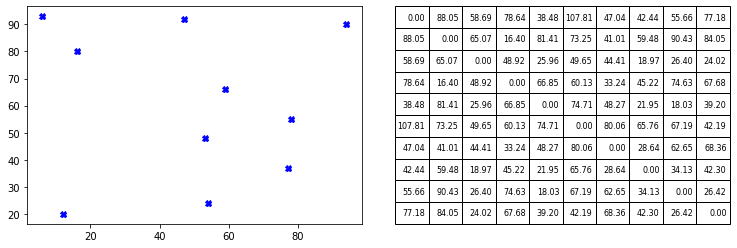

In [3]:


cities = [random.sample(range(100), 2) for x in range(num_cities)];
print(cities)

model = w1_utils.get_distances(cities)
w1_utils.plot_cities(cities,model)

### Model: the matrix of distances between cities
### Output: A tour that visits each city exactly once

- Condition on output:   Try to minimise tour length

### Optimisation Algorithm: greedy constructive search
- Starts with random city then repeatedly adds edge to closest unvisited city.
- Not very good, but illustrates the point

tour is [8, 9, 2, 5, 3, 6, 7, 0, 4, 1]


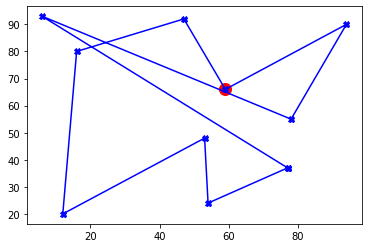

In [7]:
def greedyConstructive(start = 0):
    tour = [-1 for i in range (num_cities)]
    tour[start]=0; 
    #loop through stops on the tour
    for i in range(1,num_cities):
        #get list of unvisited cities
        unvisited = [ i for i in range(num_cities) if tour[i]==-1 ]
        #finding the next closest unvisited place
        min_dist = 100000
        for k in unvisited:
            dist_ik = model[tour[i-1]][k]
            if   dist_ik < min_dist:
                min_dist = dist_ik
                min_k = k
        tour[min_k] =i
    return(tour)

start = random.randint(0,num_cities-1)
tour = greedyConstructive(start)
print(f'tour is {tour}')
w1_utils.show_tour(cities,tour,start)

# Other example optimisation problems
- finding set of parameters for a design
 - 'look and feel' of a web page via CSS
 - component sizes and materials for physical design
 -  grouping data and methods into classes in software design
- path-finding
- action planning  in games, robotics,...

# Modelling example:
### Learning a model from examples of fruit

Starting by making a dataset describing some fruit (se next notebook)


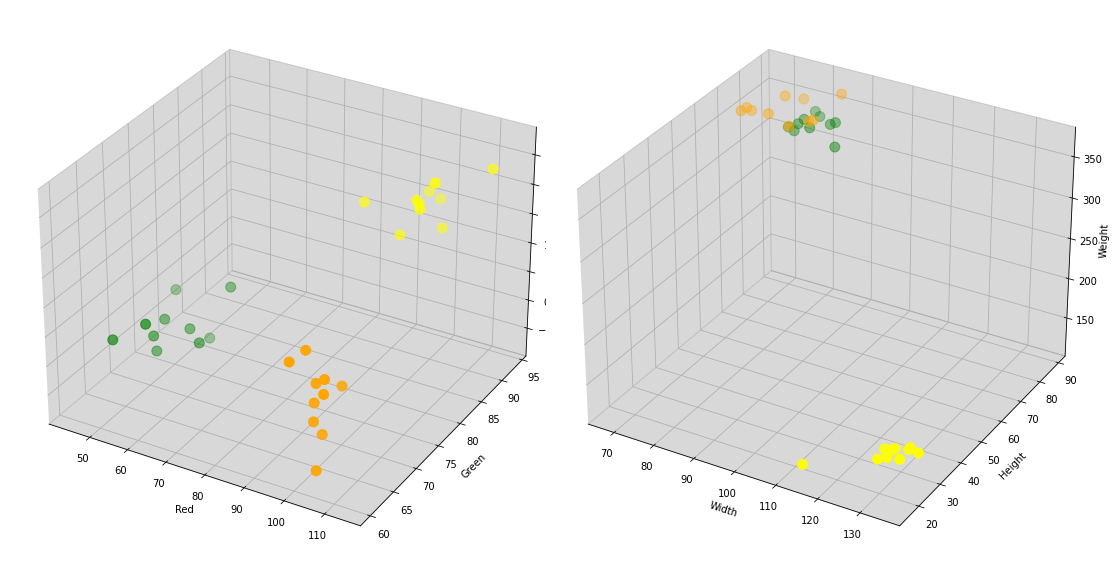

In [8]:
import w1_utils, numpy as np, matplotlib.pyplot as plt
np.set_printoptions(precision=2)

feature_values,labels = w1_utils.makeFakeFruit()
fig = w1_utils.make3dscatters(feature_values,labels)
plt.show()

Then reminding ourselves what it looks like 

In [9]:
for feats,label in zip(feature_values,labels):
    print (feats,label)

[101.25  85.44  20.49 128.69  25.9  127.43] banana
[ 48.61  63.94   2.15  84.74  83.17 340.17] apple
[105.04  60.36  -5.68  74.5   81.01 366.5 ] orange
[105.09  82.1   22.46 130.74  32.82 125.09] banana
[100.16  64.35   4.94  76.28  86.4  354.22] orange
[101.54  64.55  -3.57  82.16  68.66 364.33] orange
[ 98.7   83.53  16.01 126.27  29.53 124.72] banana
[100.43  63.65  -0.94  68.58  71.38 360.21] orange
[ 55.06  65.68   4.88  85.79  83.67 342.67] apple
[104.48  62.29   5.58  84.02  76.43 358.04] orange
[ 60.12  72.46  -2.29  78.2   88.31 337.34] apple
[102.44  64.2    6.2   82.5   77.15 353.53] orange
[113.71  90.76  25.   134.4   29.23 133.87] banana
[ 50.21  71.28  -4.85  79.11  78.52 343.27] apple
[ 96.03  65.66   8.69  68.22  74.6  357.26] orange
[ 59.    80.01   1.91  79.35  80.87 344.23] apple
[ 97.63  91.12  18.2  130.71  32.01 124.69] banana
[ 50.99  70.16  -1.23  80.02  87.06 335.95] apple
[108.29  82.45  27.09 132.03  25.17 132.93] banana
[ 44.19  79.9   -1.32  82.61  77.44 3

## Simple Decision Tree Classifier

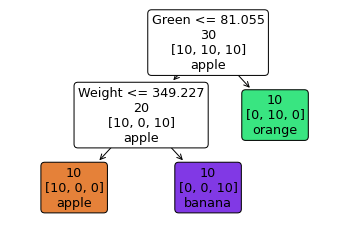

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


model = DecisionTreeClassifier() ## <<<<< make an empty decision tree object
model.fit(feature_values,labels) ## <<<<< call "fit" to learn decision boundaries from data 

feature_names = ['Red','Green','Blue','Width','Height','Weight']
fruit_types=('apple','orange','banana')
theTree = plot_tree(model, feature_names = feature_names,class_names = fruit_types,label = 'none',filled = True, impurity = False,rounded=True)

# Other Modelling Examples:
- Getting expertise from a person and coding that up in a rule base
 - e.g. a chatbot
 
- more on this in the next video and Weeks 2-4

# Prediction Example: 
## Using the learned model to predict the type of a new bit of fruit
<img style="float:left" src = "figs/lime.jpg">
 
 - RGB = (50,205,50)
 - size = 40mm, round
-  weight = 44g

In [11]:
new_fruit_features = np.array([50,205,50,40,40,44]) ## (R,G,B, width,height,weight)
prediction = model.predict(new_fruit_features.reshape(1,-1)) ## array of predictions
print(f'For a new fruit with features {new_fruit_features} the prediction is {prediction[0]}')


For a new fruit with features [ 50 205  50  40  40  44] the prediction is banana


# Other prediction examples

- Face Recognition
- Voice Recognition ( Speech To text)
- Auto-captioning videos 
- Time series prediction
 - spread of Covid-19
 - e.g. air quality tomorrow so measures can be taken

# Take Home Message
- Problem solving <=> finding the right choice for the 'missing piece'
- This gives us  a way of:
 - breaking up big problems into little ones
 - identfying what type of problem each sub-problem is
 - and so identifying the right technology to use for that sub-problem
 
## You need to:
- learn the names of the three types of problem, 
- and what kind of question they correspond to
- practise identfying what type of problem you have